## To predict profit

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option("display.max_columns",None)

In [2]:
data =pd.read_csv("ORDERS.csv",encoding='latin-1')

In [3]:
data

,ROWID,ORDERID,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,SHIPPINGCOSTS,CUSTOMERNAME,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET
0,1,3,10/13/10,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/10,Superstore
1,49,293,10/1/12,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/12,Superstore
2,50,293,10/1/12,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/12,Superstore
3,80,483,7/10/11,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/11,Superstore
4,85,515,8/28/10,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/10,Superstore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,8/9/10,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,8/9/10,Superstore
8395,7766,55558,8/9/10,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,8/11/10,Superstore
8396,7906,56550,4/8/11,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,4/10/11,Superstore
8397,7907,56550,4/8/11,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,4/9/11,Superstore


##### To check the shape of dataset 

In [4]:
data.shape

(8399, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROWID               8399 non-null   int64  
 1   ORDERID             8399 non-null   int64  
 2   ORDERDATE           8399 non-null   object 
 3   ORDERPRIOTORITY     8399 non-null   object 
 4   ORDERQUANTITY       8399 non-null   int64  
 5   SALES               8399 non-null   float64
 6   DISCOUNT            8399 non-null   float64
 7   SHIPMODE            8399 non-null   object 
 8   PROFIT              8399 non-null   float64
 9   UNITPRICE           8399 non-null   float64
 10  SHIPPINGCOSTS       8399 non-null   float64
 11  CUSTOMERNAME        8399 non-null   object 
 12  PROVINCE            8399 non-null   object 
 13  REGION              8399 non-null   object 
 14  CUSTOMERSEGMENT     8399 non-null   object 
 15  PRODUCTCATEGORY     8399 non-null   object 
 16  PRODUC

In [6]:
data.describe()

,ROWID,ORDERID,ORDERQUANTITY,SALES,DISCOUNT,PROFIT,UNITPRICE,SHIPPINGCOSTS,PRODUCTBASEMARGIN
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,4200.000000,29965.179783,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557,0.512513
std,2424.726789,17260.883447,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052,0.135589
min,1.000000,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,0.350000
25%,2100.500000,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,0.380000
50%,4200.000000,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,0.520000
75%,6299.500000,44596.000000,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000,0.590000
max,8399.000000,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


In [7]:
data.describe(include="object")

,ORDERDATE,ORDERPRIOTORITY,SHIPMODE,CUSTOMERNAME,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,SHIPDATE,DATASET
count,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399
unique,1418,5,3,795,13,8,4,3,17,1263,7,1450,1
top,9/15/11,High,Regular Air,Darren Budd,Ontario,West,Corporate,Office Supplies,Paper,"Global High-Back Leather Tilter, Burgundy",Small Box,5/21/11,Superstore
freq,20,1768,6270,41,1826,1991,3076,4610,1225,24,4347,19,8399


In [8]:
data.columns

Index(['ROWID', 'ORDERID', 'ORDERDATE', 'ORDERPRIOTORITY', 'ORDERQUANTITY',
       'SALES', 'DISCOUNT', 'SHIPMODE', 'PROFIT', 'UNITPRICE', 'SHIPPINGCOSTS',
       'CUSTOMERNAME', 'PROVINCE', 'REGION', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTSUBCATEGORY', 'PRODUCTNAME',
       'PRODUCTCONTAINER', 'PRODUCTBASEMARGIN', 'SHIPDATE', 'DATASET'],
      dtype='object')

## Checking duplicates 

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data[data.duplicated()==True]

,ROWID,ORDERID,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,SHIPPINGCOSTS,CUSTOMERNAME,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET


In [11]:
data

,ROWID,ORDERID,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,SHIPPINGCOSTS,CUSTOMERNAME,PROVINCE,REGION,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET
0,1,3,10/13/10,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/10,Superstore
1,49,293,10/1/12,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/12,Superstore
2,50,293,10/1/12,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/12,Superstore
3,80,483,7/10/11,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/11,Superstore
4,85,515,8/28/10,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/10,Superstore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,8/9/10,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,8/9/10,Superstore
8395,7766,55558,8/9/10,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,8/11/10,Superstore
8396,7906,56550,4/8/11,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,4/10/11,Superstore
8397,7907,56550,4/8/11,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,4/9/11,Superstore


## Drop reductant columns 

In [12]:
data.drop(["ORDERDATE","CUSTOMERNAME","REGION","DATASET","ROWID","ORDERID","PRODUCTSUBCATEGORY","PRODUCTNAME"],axis=1,inplace=True)

In [13]:
data[data.duplicated()==True].index

Index([], dtype='int64')

## Treating null values 

In [14]:
data.isnull().sum()

ORDERPRIOTORITY       0
ORDERQUANTITY         0
SALES                 0
DISCOUNT              0
SHIPMODE              0
PROFIT                0
UNITPRICE             0
SHIPPINGCOSTS         0
PROVINCE              0
CUSTOMERSEGMENT       0
PRODUCTCATEGORY       0
PRODUCTCONTAINER      0
PRODUCTBASEMARGIN    63
SHIPDATE              0
dtype: int64

In [15]:
data.select_dtypes(include="object").columns

Index(['ORDERPRIOTORITY', 'SHIPMODE', 'PROVINCE', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTCONTAINER', 'SHIPDATE'],
      dtype='object')

In [16]:
data

,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE
0,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Nunavut,Small Business,Office Supplies,Large Box,0.80,10/20/10
1,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Nunavut,Consumer,Office Supplies,Jumbo Drum,0.58,10/2/12
2,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Nunavut,Consumer,Office Supplies,Small Box,0.39,10/3/12
3,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Nunavut,Corporate,Technology,Small Box,0.58,7/12/11
4,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Nunavut,Consumer,Office Supplies,Medium Box,0.50,8/30/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Alberta,Consumer,Furniture,Jumbo Box,0.65,8/9/10
8395,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Alberta,Consumer,Office Supplies,Small Box,0.38,8/11/10
8396,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Alberta,Home Office,Furniture,Small Pack,0.41,4/10/11
8397,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Alberta,Home Office,Technology,Small Box,0.56,4/9/11


In [17]:
data["CUSTOMERSEGMENT"].mode()

0    Corporate
Name: CUSTOMERSEGMENT, dtype: object

In [18]:
data["CUSTOMERSEGMENT"].fillna(data["CUSTOMERSEGMENT"].mode()[0],inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\4080981246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["CUSTOMERSEGMENT"].fillna(data["CUSTOMERSEGMENT"].mode()[0],inplace=True)


In [19]:
data

,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE
0,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Nunavut,Small Business,Office Supplies,Large Box,0.80,10/20/10
1,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Nunavut,Consumer,Office Supplies,Jumbo Drum,0.58,10/2/12
2,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Nunavut,Consumer,Office Supplies,Small Box,0.39,10/3/12
3,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Nunavut,Corporate,Technology,Small Box,0.58,7/12/11
4,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Nunavut,Consumer,Office Supplies,Medium Box,0.50,8/30/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Alberta,Consumer,Furniture,Jumbo Box,0.65,8/9/10
8395,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Alberta,Consumer,Office Supplies,Small Box,0.38,8/11/10
8396,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Alberta,Home Office,Furniture,Small Pack,0.41,4/10/11
8397,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Alberta,Home Office,Technology,Small Box,0.56,4/9/11


In [20]:
data["SHIPMODE"].fillna(data["SHIPMODE"].mode()[0],inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\953919871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["SHIPMODE"].fillna(data["SHIPMODE"].mode()[0],inplace=True)


In [21]:
data.columns

Index(['ORDERPRIOTORITY', 'ORDERQUANTITY', 'SALES', 'DISCOUNT', 'SHIPMODE',
       'PROFIT', 'UNITPRICE', 'SHIPPINGCOSTS', 'PROVINCE', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTCONTAINER', 'PRODUCTBASEMARGIN', 'SHIPDATE'],
      dtype='object')

In [22]:
data["PRODUCTCONTAINER"].fillna(data["PRODUCTCONTAINER"].mode()[0],inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\553964459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PRODUCTCONTAINER"].fillna(data["PRODUCTCONTAINER"].mode()[0],inplace=True)


In [23]:
data["ORDERPRIOTORITY"].fillna(data["ORDERPRIOTORITY"].mode()[0],inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\1346593801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ORDERPRIOTORITY"].fillna(data["ORDERPRIOTORITY"].mode()[0],inplace=True)


In [24]:
data["PROVINCE"].fillna(data["PROVINCE"].mode()[0],inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\3696189173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PROVINCE"].fillna(data["PROVINCE"].mode()[0],inplace=True)


In [25]:
data["SALES"].fillna(data["SALES"].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\3091882069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["SALES"].fillna(data["SALES"].mean(),inplace=True)


In [26]:
data["DISCOUNT"].fillna(data["DISCOUNT"].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\4093333915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["DISCOUNT"].fillna(data["DISCOUNT"].mean(),inplace=True)


In [27]:
data["PROFIT"].fillna(data["PROFIT"].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\2526328173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PROFIT"].fillna(data["PROFIT"].mean(),inplace=True)


In [28]:
data["UNITPRICE"].fillna(data["UNITPRICE"].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\1366232741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["UNITPRICE"].fillna(data["UNITPRICE"].mean(),inplace=True)


In [29]:
data["SHIPPINGCOSTS"].fillna(data["SHIPPINGCOSTS"].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\578175137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["SHIPPINGCOSTS"].fillna(data["SHIPPINGCOSTS"].mean(),inplace=True)


In [30]:
data["PRODUCTBASEMARGIN"].fillna(data["PRODUCTBASEMARGIN"].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\3052671916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PRODUCTBASEMARGIN"].fillna(data["PRODUCTBASEMARGIN"].mean(),inplace=True)


In [31]:
for i in data.select_dtypes(exclude="object").columns:
    data[i].fillna(data[i].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\4060539878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mean(),inplace=True)


In [32]:
data.isnull().sum()

ORDERPRIOTORITY      0
ORDERQUANTITY        0
SALES                0
DISCOUNT             0
SHIPMODE             0
PROFIT               0
UNITPRICE            0
SHIPPINGCOSTS        0
PROVINCE             0
CUSTOMERSEGMENT      0
PRODUCTCATEGORY      0
PRODUCTCONTAINER     0
PRODUCTBASEMARGIN    0
SHIPDATE             0
dtype: int64

<Axes: xlabel='CUSTOMERSEGMENT'>

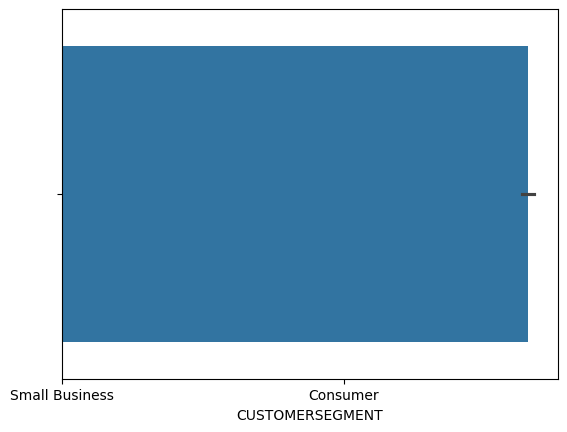

In [33]:
sns.barplot(data=data,x="CUSTOMERSEGMENT")

<Axes: xlabel='CUSTOMERSEGMENT'>

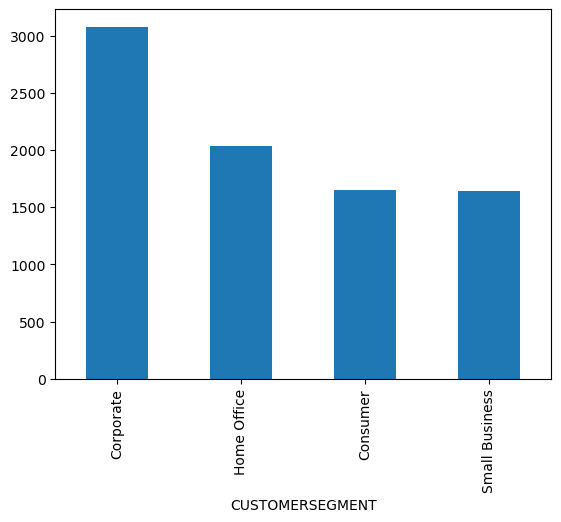

In [34]:
data["CUSTOMERSEGMENT"].value_counts().plot(kind="bar")

<Axes: xlabel='SALES', ylabel='PROFIT'>

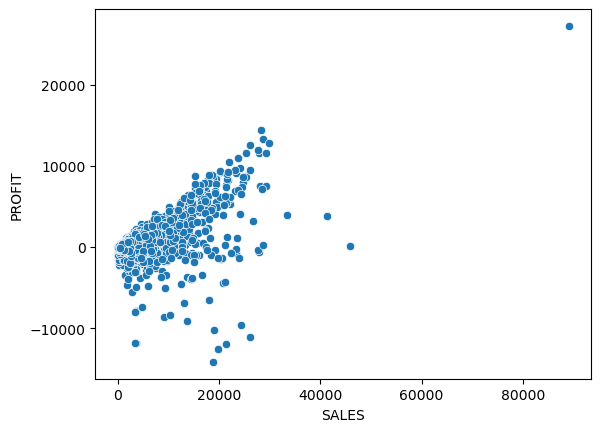

In [35]:
sns.scatterplot(data=data,x="SALES",y="PROFIT")

<Axes: >

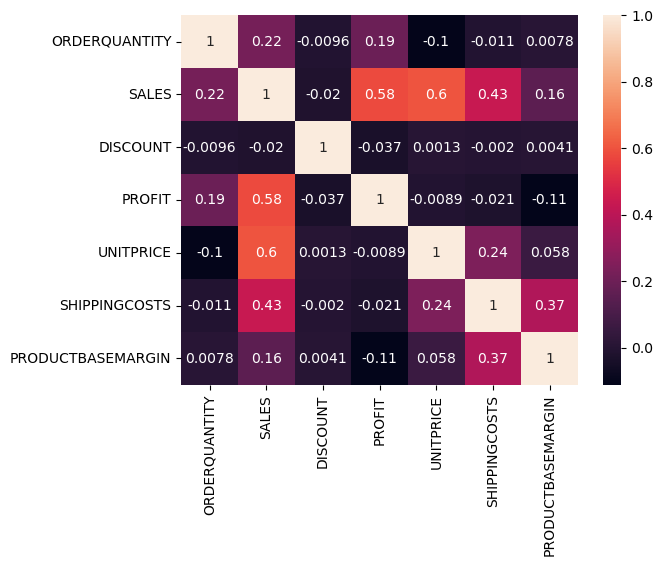

In [36]:
sns.heatmap(data.select_dtypes(exclude="object").corr(),annot=True)

In [37]:
import matplotlib.pyplot as plt

In [38]:
data.select_dtypes(exclude="object").columns

Index(['ORDERQUANTITY', 'SALES', 'DISCOUNT', 'PROFIT', 'UNITPRICE',
       'SHIPPINGCOSTS', 'PRODUCTBASEMARGIN'],
      dtype='object')

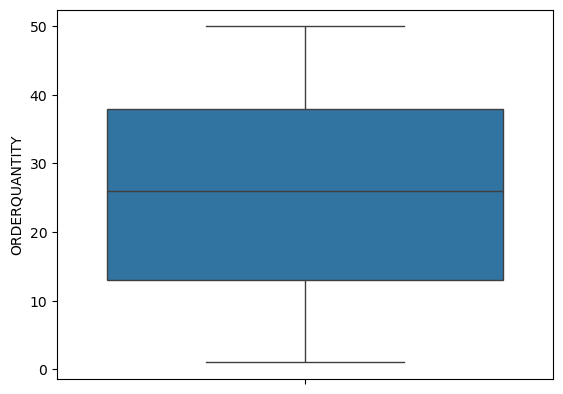

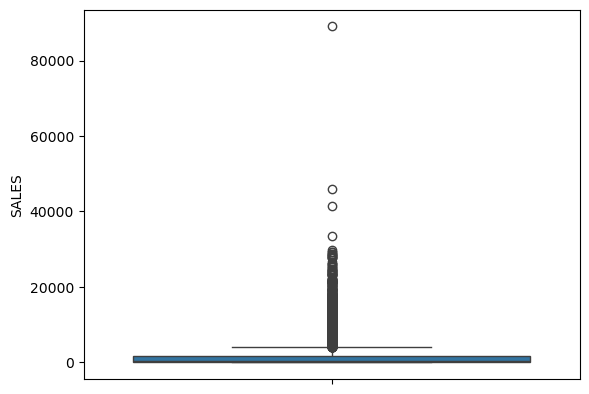

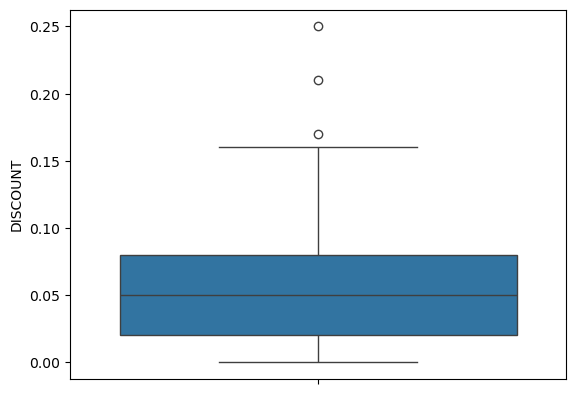

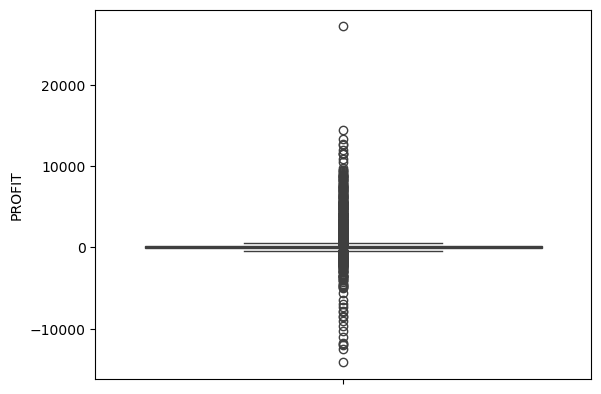

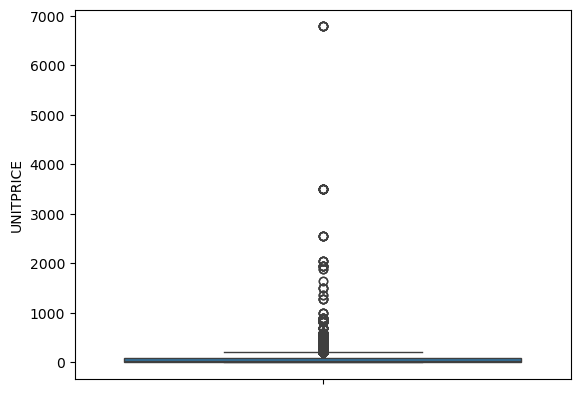

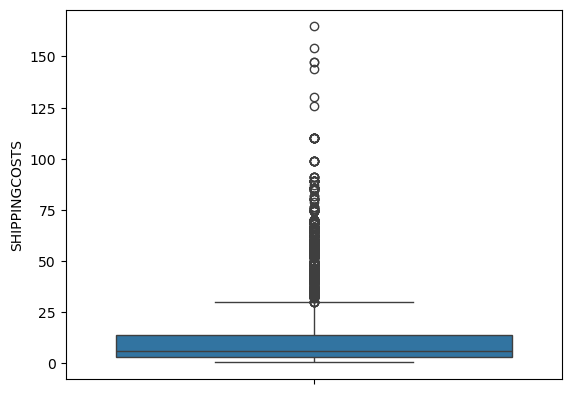

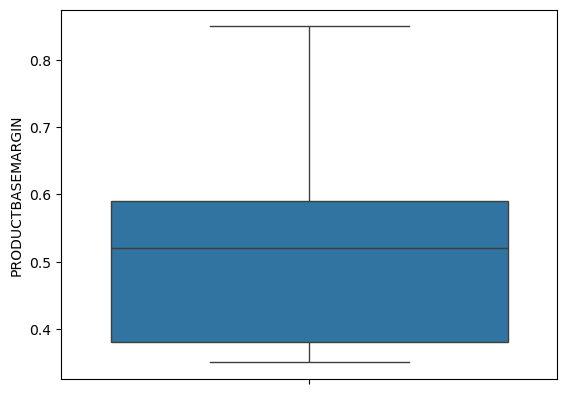

In [39]:
for i in data.select_dtypes(exclude="object").columns:
    sns.boxplot(data[i])
    plt.show()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x= data.drop("PROFIT",axis=1)
y = data["PROFIT"]

In [42]:
xtrain ,xtest , ytrain  , ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [43]:
xtrain.shape

(6719, 13)

In [44]:
xtest.shape

(1680, 13)

In [45]:
ytrain.shape , ytest.shape

((6719,), (1680,))

In [46]:
for i in xtrain.select_dtypes(exclude="object").columns:
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr = q3-q1
    u = q3+(1.5*iqr)
    l = q1-(1.5*iqr)
    xtrain[i]=xtrain[i].apply(lambda x:l if x<l else u if x>u else x)

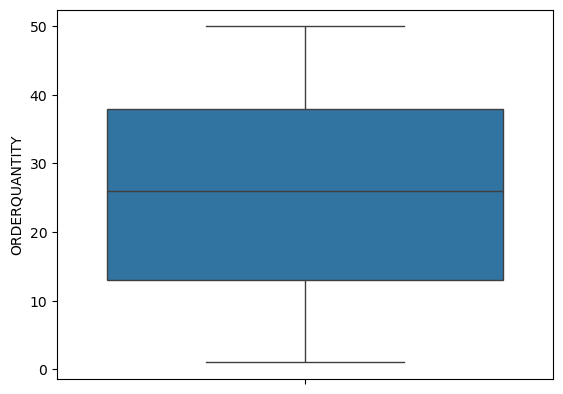

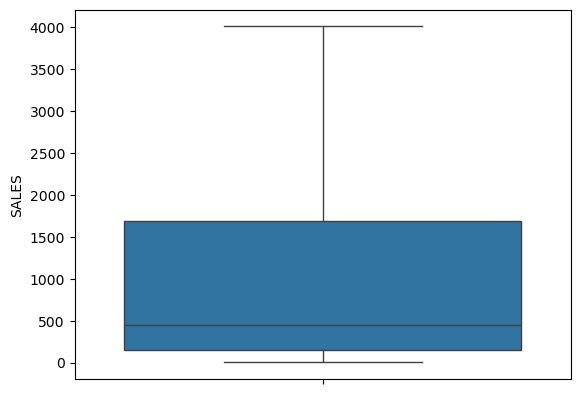

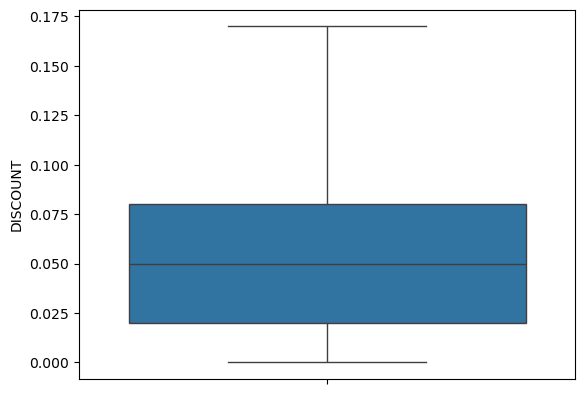

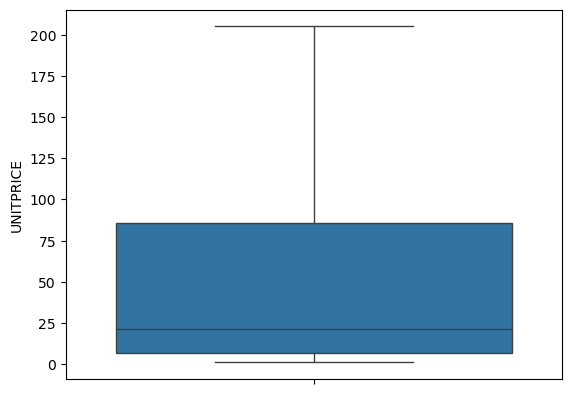

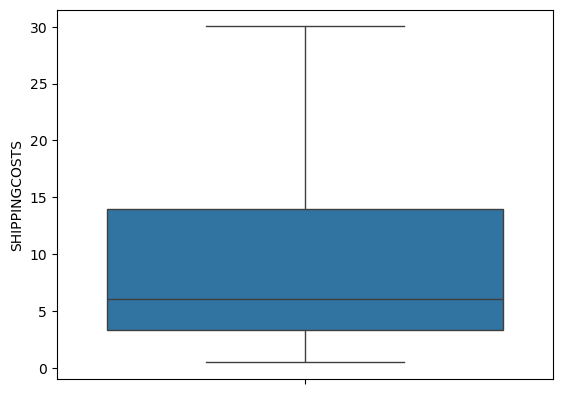

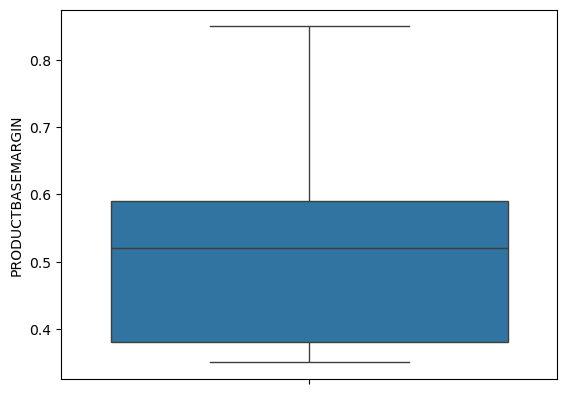

In [47]:
for i in xtrain.select_dtypes(exclude="object").columns:
    sns.boxplot(xtrain[i])
    plt.show()

In [48]:
import statsmodels.api as sm

In [49]:
xtrain_c= sm.add_constant(xtrain)

In [50]:
xtest_c= sm.add_constant(xtest)

In [51]:
xtrain_c

,const,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE
6690,1.0,Low,39,647.81,0.10,Regular Air,17.670,8.990,Yukon,Small Business,Furniture,Small Pack,0.47,2/6/12
4831,1.0,Low,33,103.32,0.00,Regular Air,2.980,2.030,Manitoba,Home Office,Office Supplies,Wrap Bag,0.57,4/18/12
7880,1.0,Not Specified,29,60.68,0.09,Regular Air,1.980,4.770,Alberta,Small Business,Office Supplies,Small Box,0.40,4/9/11
1598,1.0,Not Specified,4,136.68,0.01,Express Air,30.730,4.000,Manitoba,Small Business,Technology,Small Box,0.75,7/24/10
215,1.0,Low,47,4012.47,0.06,Delivery Truck,205.255,30.025,Northwest Territories,Corporate,Furniture,Jumbo Drum,0.59,7/5/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,1.0,Not Specified,27,217.93,0.03,Regular Air,7.640,5.830,Northwest Territories,Corporate,Office Supplies,Wrap Bag,0.36,8/26/09
3714,1.0,Not Specified,16,68.04,0.07,Regular Air,3.980,5.260,Quebec,Consumer,Office Supplies,Small Box,0.38,10/10/09
7409,1.0,Critical,18,526.45,0.02,Regular Air,28.480,8.990,British Columbia,Home Office,Technology,Small Pack,0.70,9/15/10
3325,1.0,Low,14,700.46,0.02,Express Air,48.040,7.230,Quebec,Corporate,Office Supplies,Small Box,0.37,5/20/10


In [52]:
xtest_c

,const,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE
3233,1.0,High,47,6131.5400,0.06,Regular Air,128.24,12.65,Quebec,Small Business,Furniture,Medium Box,0.512513,9/13/11
7414,1.0,Low,26,69.3800,0.08,Regular Air,2.52,4.28,British Columbia,Home Office,Office Supplies,Wrap Bag,0.440000,1/10/12
6483,1.0,Not Specified,11,15.5300,0.00,Regular Air,1.26,0.70,Yukon,Corporate,Office Supplies,Wrap Bag,0.810000,3/16/12
8321,1.0,Low,43,10318.7200,0.01,Delivery Truck,240.98,60.20,Alberta,Corporate,Furniture,Jumbo Box,0.560000,2/16/09
5716,1.0,Not Specified,37,6072.1875,0.09,Regular Air,205.99,2.50,Saskachewan,Home Office,Technology,Small Box,0.590000,12/6/11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,1.0,Not Specified,22,795.7400,0.00,Delivery Truck,33.94,19.19,Northwest Territories,Home Office,Furniture,Jumbo Drum,0.580000,6/29/10
737,1.0,High,30,397.1700,0.10,Express Air,14.34,5.00,British Columbia,Corporate,Furniture,Small Pack,0.490000,8/20/10
5448,1.0,Low,4,292.3405,0.01,Regular Air,85.99,0.99,Saskachewan,Corporate,Technology,Wrap Bag,0.850000,9/17/09
5526,1.0,Not Specified,24,1307.0000,0.02,Regular Air,54.48,0.99,Saskachewan,Home Office,Office Supplies,Small Box,0.570000,4/15/12


In [90]:
for i in xtrain.select_dtypes(include="object"):
    xtrain[i].fillna(xtrain[i].mode()[0],inplace=True)
    xtest[i].fillna(xtrain[i].mode()[0],inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\2419107680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtrain[i].fillna(xtrain[i].mode()[0],inplace=True)
C:\Users\anita\AppData\Local\Temp\ipykernel_14680\2419107680.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [91]:
for i in xtrain.select_dtypes(exclude="object"):
    xtrain[i].fillna(xtrain[i].mean(),inplace=True)
    xtest[i].fillna(xtrain[i].mean(),inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_14680\2502154983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtrain[i].fillna(xtrain[i].mean(),inplace=True)
C:\Users\anita\AppData\Local\Temp\ipykernel_14680\2502154983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

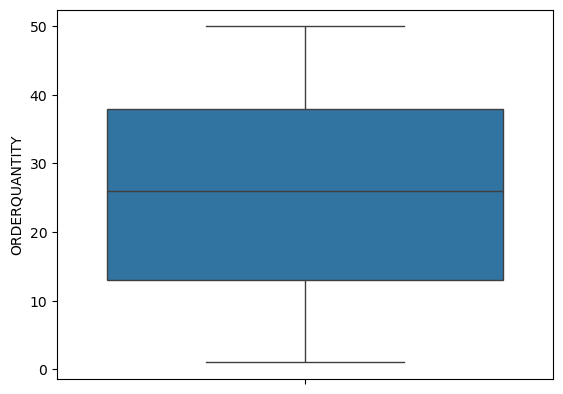

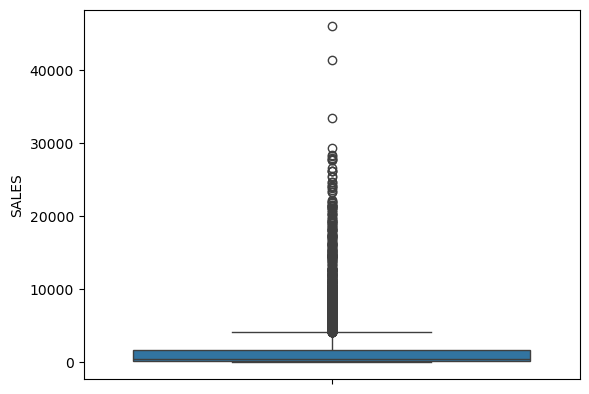

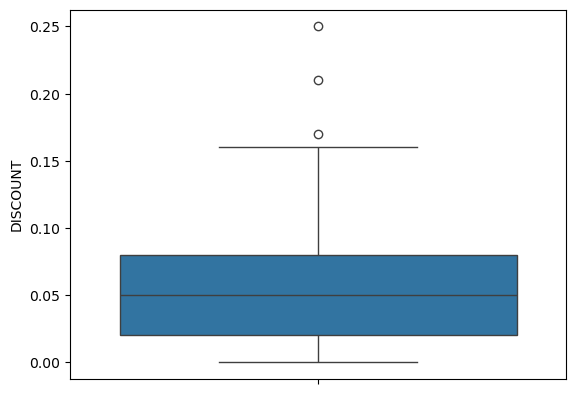

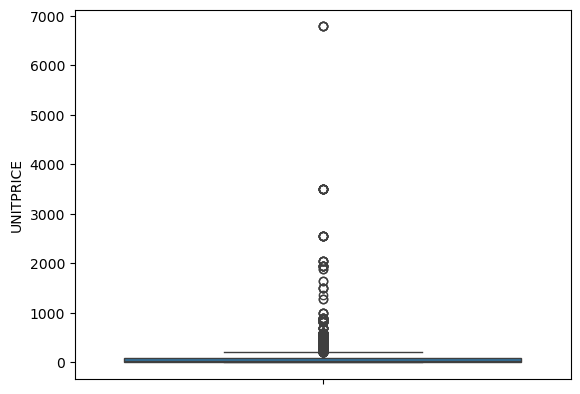

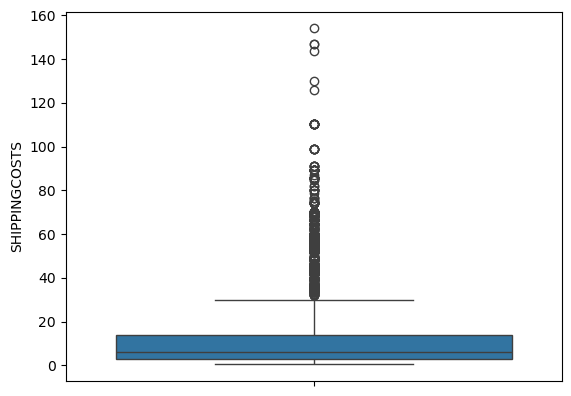

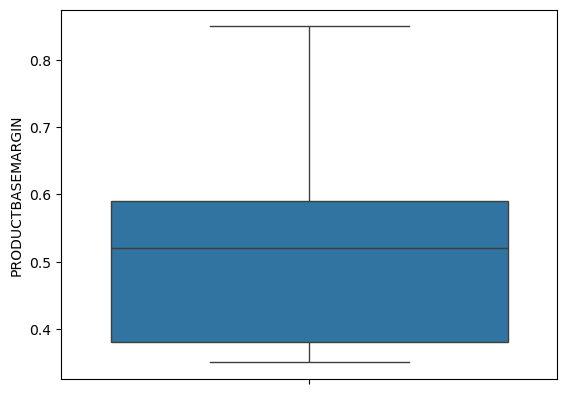

In [92]:
for i in xtrain.select_dtypes(exclude="object"):
    sns.boxplot(xtrain[i])
    plt.show()

In [93]:
data["PROFIT"].value_counts(normalize=True)*100

PROFIT
-969.05    0.095249
 11.65     0.071437
-433.29    0.071437
-715.78    0.059531
-528.65    0.059531
             ...   
-166.85    0.011906
-226.36    0.011906
-695.26    0.011906
 127.70    0.011906
-54.04     0.011906
Name: proportion, Length: 7807, dtype: float64

In [94]:
xtrain.select_dtypes(include="object").describe()

,ORDERPRIOTORITY,SHIPMODE,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTCONTAINER,SHIPDATE
count,6719,6719,6719,6719,6719,6719,6719
unique,5,3,13,4,3,7,1438
top,High,Regular Air,Ontario,Corporate,Office Supplies,Small Box,10/4/12
freq,1416,4985,1451,2492,3673,3459,15


In [102]:
xtest["CUSTOMERSEGMENT"].value_counts()

CUSTOMERSEGMENT
Corporate         584
Home Office       395
Consumer          370
Small Business    331
Name: count, dtype: int64

In [103]:
xtrain["CUSTOMERSEGMENT"]=xtrain["CUSTOMERSEGMENT"].apply(lambda x:1 if x=="Corporate" else 0)

In [104]:
xtest["CUSTOMERSEGMENT"]=xtest["CUSTOMERSEGMENT"].apply(lambda x:1 if x=="Corporate" else 0)

In [99]:
xtrain["ORDERPRIOTORITY"].value_counts()

ORDERPRIOTORITY
0    5303
1    1416
Name: count, dtype: int64

In [105]:
xtest["CUSTOMERSEGMENT"].value_counts()

CUSTOMERSEGMENT
0    1096
1     584
Name: count, dtype: int64

In [108]:
xtest["ORDERPRIOTORITY"].value_counts()

ORDERPRIOTORITY
3    1680
Name: count, dtype: int64

In [109]:
xtrain["ORDERPRIOTORITY"]=xtrain["ORDERPRIOTORITY"].apply(lambda x:1 if x=="Low" else 2 if x=="High" else 3)
xtest["ORDERPRIOTORITY"]=xtest["ORDERPRIOTORITY"].apply(lambda x:1 if x=="Low" else 2 if x=="High" else 3)

In [110]:
xtest["ORDERPRIOTORITY"].value_counts()

ORDERPRIOTORITY
3    1680
Name: count, dtype: int64

In [111]:
xtrain["ORDERPRIOTORITY"].value_counts()

ORDERPRIOTORITY
3    6719
Name: count, dtype: int64

In [112]:
xtrain["PRODUCTCONTAINER"].value_counts()

PRODUCTCONTAINER
Small Box     3459
Wrap Bag       948
Small Pack     762
Jumbo Drum     508
Jumbo Box      432
Large Box      319
Medium Box     291
Name: count, dtype: int64

In [113]:
train_en_cl=pd.get_dummies(xtrain["PRODUCTCONTAINER"]).astype("int64")

In [114]:
test_en_cl=pd.get_dummies(xtest["PRODUCTCONTAINER"]).astype("int64")

In [115]:
xtrain = pd.concat([train_en_cl,xtrain],axis=1)

In [116]:
xtest

,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE
4971,3,24,1548.4300,0.02,Regular Air,63.94,14.48,Manitoba,0,Furniture,Small Box,0.46,10/4/09
2523,3,14,700.9500,0.00,Regular Air,46.89,5.10,Ontario,1,Office Supplies,Medium Box,0.46,10/28/10
6499,3,30,442.7600,0.09,Regular Air,15.01,8.40,Yukon,1,Office Supplies,Small Box,0.39,8/15/11
1144,3,36,9544.1800,0.00,Express Air,256.99,11.25,British Columbia,1,Technology,Small Box,0.51,10/30/11
7283,3,41,576.5800,0.04,Regular Air,13.90,7.59,British Columbia,0,Office Supplies,Small Pack,0.56,1/18/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,3,24,67.3500,0.07,Regular Air,2.88,0.50,British Columbia,1,Office Supplies,Small Box,0.39,6/24/09
6673,3,4,11.0800,0.06,Regular Air,1.74,4.08,Yukon,1,Furniture,Small Pack,0.53,1/26/09
8265,3,5,495.3200,0.05,Delivery Truck,100.98,15.66,Alberta,0,Office Supplies,Jumbo Drum,0.57,9/9/12
99,3,14,1170.0250,0.04,Regular Air,95.99,8.99,Northwest Territories,0,Technology,Small Box,0.57,1/5/12


In [118]:
xtest.drop("PRODUCTCONTAINER",axis=1,inplace=True)

In [119]:
xtrain.head(1)

,Jumbo Box,Jumbo Drum,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE
3955,1,0,0,0,0,0,0,3,10,1077.28,0.0,Delivery Truck,100.98,57.38,Ontario,0,Furniture,Jumbo Box,0.78,7/12/12


In [120]:
xtrain.drop("PRODUCTCONTAINER",axis=1,inplace=True)

In [121]:
xtrain

,Jumbo Box,Jumbo Drum,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTBASEMARGIN,SHIPDATE
3955,1,0,0,0,0,0,0,3,10,1077.28,0.00,Delivery Truck,100.98,57.38,Ontario,0,Furniture,0.78,7/12/12
5393,0,0,0,0,0,0,1,3,17,114.01,0.08,Regular Air,6.69,3.10,Saskachewan,1,Office Supplies,0.36,1/27/10
1318,0,1,0,0,0,0,0,3,46,3732.25,0.10,Delivery Truck,85.29,60.00,Nova Scotia,1,Furniture,0.56,3/26/11
7817,0,0,0,0,0,0,1,3,22,41.18,0.07,Regular Air,1.88,0.79,Alberta,0,Office Supplies,0.50,6/4/11
3129,0,0,0,0,1,0,0,3,14,98.37,0.09,Express Air,6.48,9.17,Quebec,1,Office Supplies,0.37,9/13/09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,1,0,0,0,0,0,0,3,46,2494.69,0.09,Delivery Truck,58.14,36.61,Yukon,1,Furniture,0.61,11/21/09
4606,0,0,0,0,1,0,0,3,4,43.56,0.01,Regular Air,9.38,4.93,New Brunswick,0,Furniture,0.57,3/16/10
3143,1,0,0,0,0,0,0,3,26,3617.64,0.07,Delivery Truck,146.34,43.75,Quebec,1,Furniture,0.64,5/11/11
7571,0,0,1,0,0,0,0,3,4,19014.24,0.06,Regular Air,6783.02,24.49,Alberta,0,Technology,0.39,9/14/10


In [122]:
xtest

,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,UNITPRICE,SHIPPINGCOSTS,PROVINCE,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTBASEMARGIN,SHIPDATE
4971,3,24,1548.4300,0.02,Regular Air,63.94,14.48,Manitoba,0,Furniture,0.46,10/4/09
2523,3,14,700.9500,0.00,Regular Air,46.89,5.10,Ontario,1,Office Supplies,0.46,10/28/10
6499,3,30,442.7600,0.09,Regular Air,15.01,8.40,Yukon,1,Office Supplies,0.39,8/15/11
1144,3,36,9544.1800,0.00,Express Air,256.99,11.25,British Columbia,1,Technology,0.51,10/30/11
7283,3,41,576.5800,0.04,Regular Air,13.90,7.59,British Columbia,0,Office Supplies,0.56,1/18/10
...,...,...,...,...,...,...,...,...,...,...,...,...
1063,3,24,67.3500,0.07,Regular Air,2.88,0.50,British Columbia,1,Office Supplies,0.39,6/24/09
6673,3,4,11.0800,0.06,Regular Air,1.74,4.08,Yukon,1,Furniture,0.53,1/26/09
8265,3,5,495.3200,0.05,Delivery Truck,100.98,15.66,Alberta,0,Office Supplies,0.57,9/9/12
99,3,14,1170.0250,0.04,Regular Air,95.99,8.99,Northwest Territories,0,Technology,0.57,1/5/12


In [123]:
ytrain

3955     -486.12
5393        6.99
1318    -1255.86
7817       -0.64
3129      -76.54
          ...   
6745     -937.06
4606       21.21
3143     -354.13
7571   -10263.66
4030      126.28
Name: PROFIT, Length: 6719, dtype: float64

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
import statsmodels.api as sa

In [126]:
xtrain_c= sa.add_constant(xtrain)

In [127]:
xtest_c= sa.add_constant(xtest)

In [128]:
ytrain = ytrain.astype("int64")

In [129]:
ytest = ytest.astype("int64")

In [135]:
model = sa.Logit(ytrain,xtrain_c).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).